In [3]:
import os 
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.ndimage

filepath = "D:/fullTumourNiftys"
def get_moment_of_inertia(nib_obj):
    intensity_data = nib_obj.get_data()
    CoM = scipy.ndimage.measurements.center_of_mass(intensity_data)
    indices = np.indices(intensity_data.shape)
    indices = np.moveaxis(indices,0,3)
    sqdist_from_CoM = np.zeros(intensity_data.shape)
    sqdist_from_CoM[:,:,:] = (indices[:,:,:,0]-CoM[0])**2+(indices[:,:,:,1]-CoM[1])**2+(indices[:,:,:,2]-CoM[2])**2
    return np.sum(intensity_data*sqdist_from_CoM)

def get_mass(nib_obj):
    intensity_data = nib_obj.get_data()
    return np.sum(intensity_data)


patients = os.listdir(filepath)

patient_dict = {}
mass_dict = {}
for patient in patients:
    I_arr,M_arr = [],[]
    scans = os.listdir(os.path.join(filepath,patient))
    for scan in scans:
        nibfile = nib.load(os.path.join(filepath,patient,scan))
        I_arr.append(get_moment_of_inertia(nibfile))
        M_arr.append(get_mass(nibfile))
    I_arr = (I_arr/I_arr[0] - 1)* 100
    M_arr = (M_arr/M_arr[0] - 1)* 100
    patient_dict[patient] = I_arr
    mass_dict[patient] = M_arr
    print(patient)

NSCLC10
NSCLC11
NSCLC16
NSCLC1_
NSCLC2_
NSCLC5_
NSCLC6_
NSCLC7_
SABR10_
SABR1__
SABR2__
SABR3__
SABR4__
SABR5__


Change names of dictionary entries to remove annoying underscores:

In [4]:
for patient in patient_dict:
    if patient.rfind("_") != -1:
        old_patient_name = patient
        patient = patient[:patient.find("_")]
        patient_dict[patient] = patient_dict.pop(old_patient_name)
        
for patient in mass_dict:
    if patient.rfind("_") != -1:
        old_patient_name = patient
        patient = patient[:patient.find("_")]
        mass_dict[patient] = mass_dict.pop(old_patient_name)

Import scan time data to include in plots

In [5]:
import numpy as np
scanfile = open("D:/allCSV/scantimes.csv")
scan_times = {}
while True:
    line = scanfile.readline()
    if line == "":
        break
    arr = line.split(",")
    name = arr[0]
    times = arr[1:]
    times = np.array(times)
    times = times[times != ""]
    times = times[times != "\n"].astype(int)
    if name[0] == "N":
        name = "NSCLC" + str(int(name[1:]))
    if name[0] == "S":
        name = "SABR" + str(int(name[1:]))
        
    if name == "SABR5":
        times = times[:-1]
        
    scan_times[name] = times
print(scan_times)

{'SABR7': array([ 0,  2,  6,  8, 10]), 'T09': array([ 0,  2,  4,  8, 11, 14, 16, 18, 23]), 'T02': array([ 0,  2,  4,  8, 10]), 'SABR4': array([ 0,  4,  6,  8, 12]), 'NSCLC2': array([ 0,  3,  6, 10, 17, 23]), 'SABR6': array([ 0,  4,  6,  8, 12]), 'NSCLC5': array([ 0,  7, 14, 21, 32, 38]), 'SABR8': array([ 0,  2,  4,  8, 10]), 'SABR2': array([0, 2, 4]), 'NSCLC6': array([ 0,  5, 13, 19, 26]), 'T05': array([ 0,  2,  6,  8, 12]), 'T03': array([ 0,  2,  6,  8, 10]), 'T01': array([ 0,  2,  4,  8, 10]), 'NSCLC1': array([ 0,  2,  9, 16, 17, 22]), 'T11': array([ 0,  2,  6,  8, 10, 14, 16, 20]), 'SABR3': array([ 0,  2,  4,  8, 10]), 'SABR9': array([ 0,  2,  4,  8, 10, 14, 16, 18]), 'SABR1': array([ 0,  2,  6,  8, 10]), 'SABR10': array([0, 2, 6]), 'NSCLC11': array([ 0,  7, 14, 21]), 'T07': array([ 0,  1,  2,  3,  4, 11, 18]), 'NSCLC10': array([ 0,  7, 11, 18]), 'T08': array([ 0,  4,  6, 10, 12]), 'NSCLC7': array([ 0,  4, 11, 18, 25, 32, 35]), 'NSCLC16': array([ 0,  5,  6, 13, 15]), 'T06': array([0

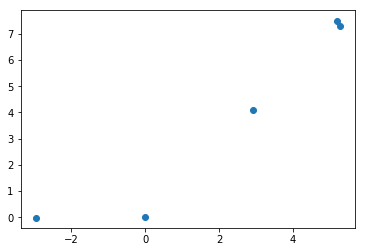

(0.9516782356523809, 0.01265828518882994)


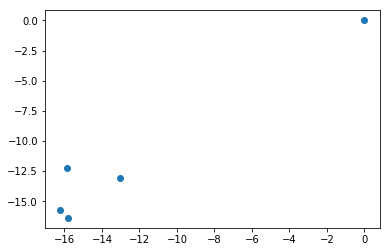

(0.970773831267516, 0.0059714330780977366)


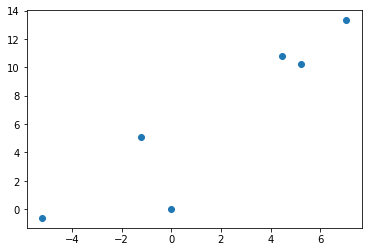

(0.9197649312430303, 0.009398236090213483)


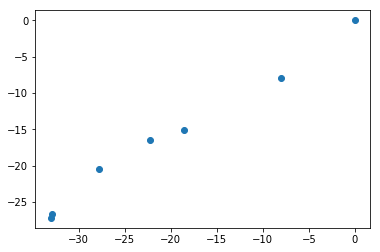

(0.9936226435523874, 6.216847449181538e-06)


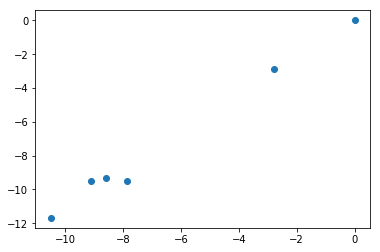

(0.9951026197448668, 3.5917769844729626e-05)


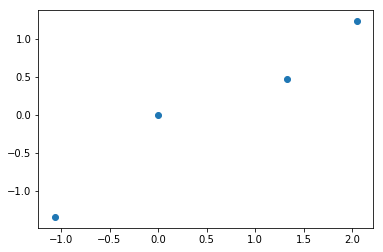

(0.9721766462078446, 0.0278233537921554)


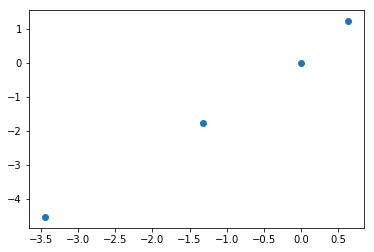

(0.9978520159430798, 0.002147984056920183)


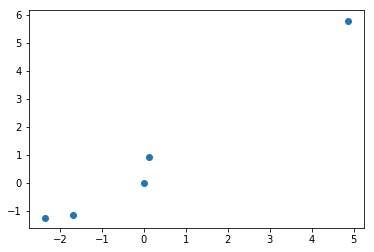

(0.9886298505417663, 0.0014529177561439983)


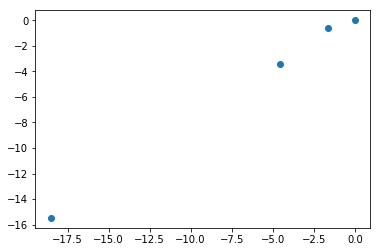

(0.9989888402248288, 0.001011159775171189)


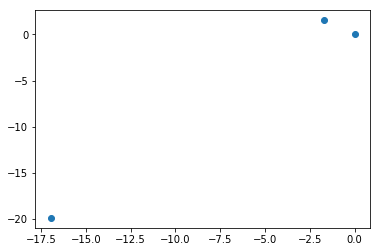

(0.9878786483848035, 0.09922253306013268)


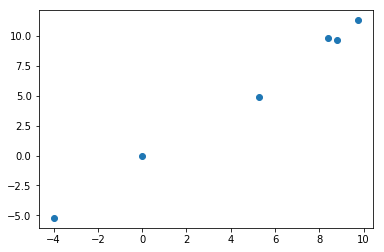

(0.9970583736155746, 1.296702148792978e-05)


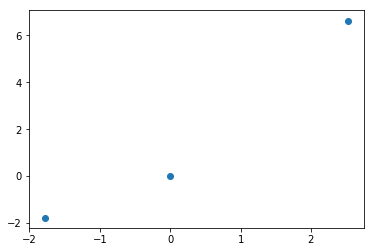

(0.9751500804469087, 0.14222013563947625)


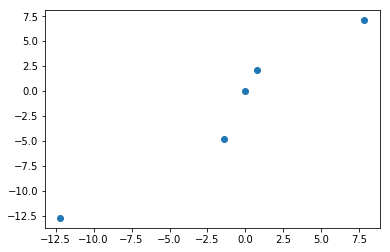

(0.9739554638916342, 0.005025795850242274)


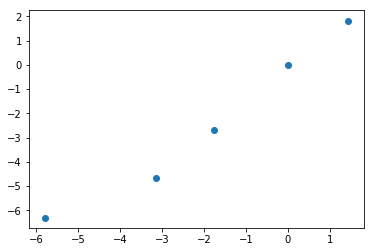

(0.9833314422610563, 0.0025768672650406384)


In [7]:
import pandas as pd
import seaborn as sns
import scipy.stats
corr_dict = {}
for patient in patient_dict:
    
    df = pd.DataFrame()
    df["mass"] = mass_dict[patient]
    df["MoI"] = patient_dict[patient]
    df["scantime"] = scan_times[patient]
    corr = df.corr(method = 'pearson')
    pearson_r = scipy.stats.pearsonr(df["mass"],df["MoI"])
    plt.scatter(df["mass"],df["MoI"])
    plt.show()
    print(pearson_r)
    corr_dict[patient] =corr["mass"]["MoI"]

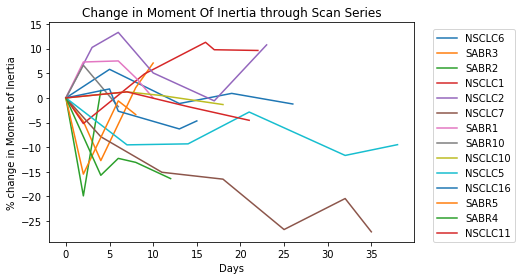

In [28]:
fig,ax = plt.subplots()

for patient in patient_dict:
    ax.plot(scan_times[patient],patient_dict[patient],label = patient,co)

ax.set_xlabel("Days")
ax.set_ylabel("% change in Moment of Inertia")
ax.set_title("Change in Moment Of Inertia through Scan Series")
lgd= plt.legend(bbox_to_anchor=(1,0.9),
           bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.savefig("D:/Interesting Pictures/momentofinertiaCOLOURED.png",transparent = False,bbox_extra_artists=(lgd,), bbox_inches='tight')

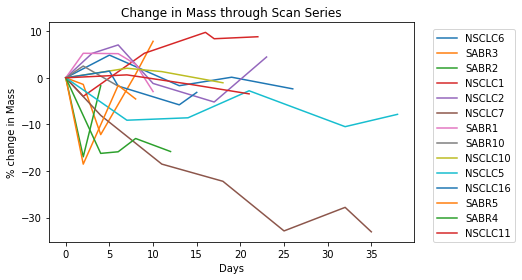

In [33]:
fig,ax = plt.subplots()

for patient in mass_dict:
    ax.plot(scan_times[patient],mass_dict[patient],label = patient)

ax.set_xlabel("Days")
ax.set_ylabel("% change in Mass")
ax.set_title("Change in Mass through Scan Series")
lgd= plt.legend(bbox_to_anchor=(1,0.9),
           bbox_transform=plt.gcf().transFigure)
plt.tight_layout()
plt.savefig("D:/Interesting Pictures/mass.png",transparent = False,bbox_extra_artists=(lgd,), bbox_inches='tight')